In [54]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.11.6
IPython version      : 9.4.0

numpy     : 2.3.1
pandas    : 2.3.0
matplotlib: 3.10.3



In [58]:
import pandas as pd
import numpy as np

# Generate linearly separable data points
np.random.seed(42)
n_samples = 100

# Generate two clusters
cluster1_x = np.random.normal(2, 1, (n_samples // 2, 2))
cluster2_x = np.random.normal(-2, 1, (n_samples // 2, 2))

# Combine clusters and create labels
X = np.vstack([cluster1_x, cluster2_x])
y = np.hstack([np.ones(n_samples // 2), np.zeros(n_samples // 2)])

# Create DataFrame
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['label'] = y

df


,x1,x2,label
0,2.496714,1.861736,1.0
1,2.647689,3.523030,1.0
2,1.765847,1.765863,1.0
3,3.579213,2.767435,1.0
4,1.530526,2.542560,1.0
...,...,...,...
95,-2.446515,-1.143601,0.0
96,-1.785906,-3.245739,0.0
97,-1.826819,-1.614683,0.0
98,-2.883857,-1.846275,0.0


In [102]:
##-- create data with drawing

from drawdata import ScatterWidget
widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
# df.to_csv('./assets/linearly_separable_data.csv', index=False)

In [103]:
df = widget.data_as_pandas
# df = pd.read_csv('./assets/linearly_separable_data.csv')
df['label'] = df['batch']
df.rename(columns={'x': 'x1','y':'x2'}, inplace=True)

In [104]:
X_train = df[['x1', 'x2']].values
y_train = df['label'].values

In [105]:
X_train.shape, y_train.shape

((39, 2), (39,))

In [106]:
import numpy as np
np.bincount(y_train)

array([19, 20])

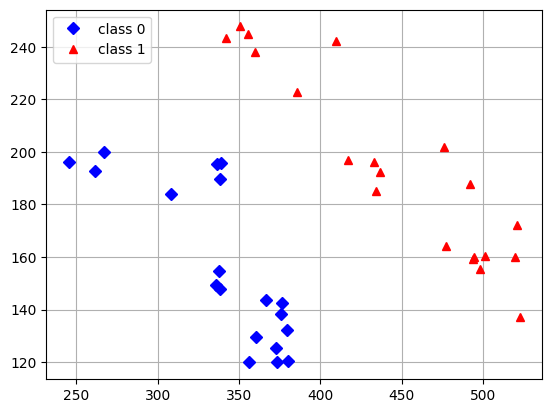

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(
    X_train[y_train==0,0], X_train[y_train==0,1], 'D', color='blue', label='class 0'
)
plt.plot(
    X_train[y_train==1,0], X_train[y_train==1,1], '^', color='red', label='class 1'
)
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [79]:
class Perceptron:
    def __init__(self, num_features):
        self.weights = [0.0 for _ in range(num_features)]
        # self.weights = np.zeros(num_features)
        self.bias = 0.0

ppn = Perceptron(num_features=2)

In [80]:
ppn.weights

[0.0, 0.0]

Let's write the mathematical formula for calculating Z (net input) in a perceptron:

Z = x₁w₁ + x₂w₂ + b

where:
- x₁, x₂ are input features 
- w₁, w₂ are weights
- b is bias term

In [81]:
class Perceptron:
    def __init__(self, num_features):
        self.weights = [0.0 for _ in range(num_features)]
        # self.weights = np.zeros(num_features)
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += self.weights[i] * x[i]

        if weighted_sum_z > 0:
            return 1
        else:
            return 0

ppn = Perceptron(num_features=2)

x = [1.1, 2.1]
ppn.forward(x)

0

In [89]:
# update method


class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        # self.weights = np.zeros(num_features)
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += self.weights[i] * x[i]
        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0
        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        #update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += x[i] * error

        return error

ppn = Perceptron(num_features=2)
x = [1.1, 2.1]
ppn.update(x, true_y=1)


1

In [90]:
print("Model Parameters:")
print(ppn.weights)
print(ppn.bias)

Model Parameters:
[1.1, 2.1]
1.0


In [91]:
def trainmodel(model, all_x, all_y, epochs=10):
    for epoch in range(epochs):
        error_count = 0
        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch+1}: Error Count = {error_count}")

In [93]:
ppn = Perceptron(num_features=2)

trainmodel(ppn, X_train, y_train, epochs=5)

Epoch 1: Error Count = 1
Epoch 2: Error Count = 3
Epoch 3: Error Count = 3
Epoch 4: Error Count = 3
Epoch 5: Error Count = 3


Original data range:
X1: [245.29, 522.51]
X2: [119.86, 247.71]

Standardized data range:
X1: [-2.00, 1.73]
X2: [-1.50, 1.94]

Standardized data mean and std:
Mean: [-7.11681426e-16 -4.95330273e-16]
Std: [1. 1.]


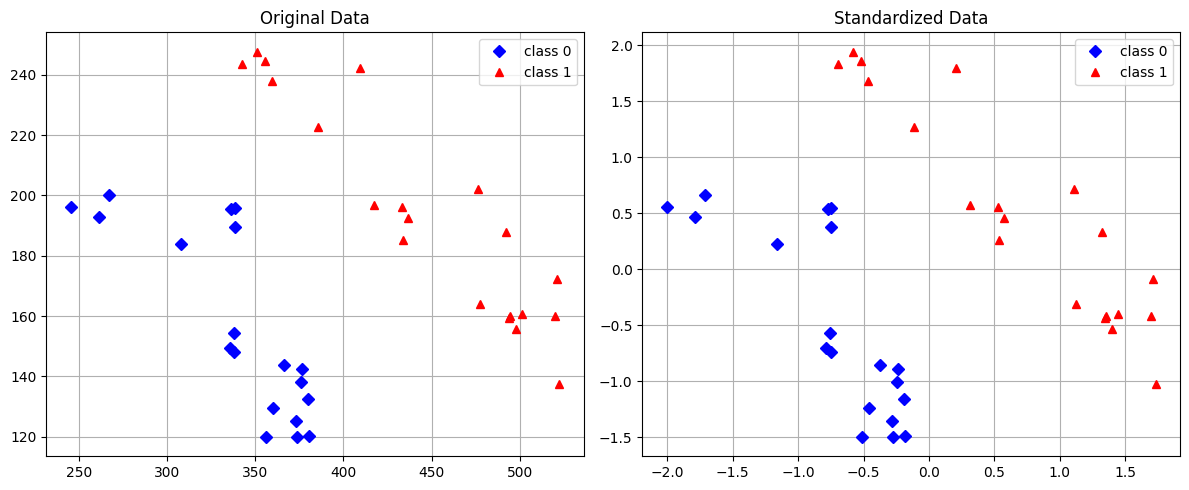

Epoch 1: Error Count = 2
Epoch 2: Error Count = 1
Epoch 3: Error Count = 0
Epoch 4: Error Count = 0
Epoch 5: Error Count = 0


In [109]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Check the standardized data
print("Original data range:")
print(f"X1: [{X_train[:, 0].min():.2f}, {X_train[:, 0].max():.2f}]")
print(f"X2: [{X_train[:, 1].min():.2f}, {X_train[:, 1].max():.2f}]")

print("\nStandardized data range:")
print(f"X1: [{X_train_scaled[:, 0].min():.2f}, {X_train_scaled[:, 0].max():.2f}]")
print(f"X2: [{X_train_scaled[:, 1].min():.2f}, {X_train_scaled[:, 1].max():.2f}]")

print("\nStandardized data mean and std:")
print(f"Mean: {X_train_scaled.mean(axis=0)}")
print(f"Std: {X_train_scaled.std(axis=0)}")

# Visualize standardized data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'D', color='blue', label='class 0')
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], '^', color='red', label='class 1')
plt.title('Original Data')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], 'D', color='blue', label='class 0')
plt.plot(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], '^', color='red', label='class 1')
plt.title('Standardized Data')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Now train with standardized data
ppn_scaled = Perceptron(num_features=2)
trainmodel(ppn_scaled, X_train_scaled, y_train, epochs=5)

# Evaluate the resul

In [111]:
ppn_scaled = Perceptron(num_features=2)
trainmodel(ppn_scaled, X_train_scaled, y_train, epochs=5)


Epoch 1: Error Count = 2
Epoch 2: Error Count = 1
Epoch 3: Error Count = 0
Epoch 4: Error Count = 0
Epoch 5: Error Count = 0


In [110]:
def evaluate(model: Perceptron, all_x, all_y):

    correct = 0
    for x,y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

train_accuracy = evaluate(ppn_scaled, scaler.fit_transform(X_train), y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")





Training Accuracy: 100.00%


In [112]:
# look at deciasion boundary

def plot_decision_boundary(model:Perceptron):

    w1, w2 = model.weights
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x2_min, x1_max, x2_max



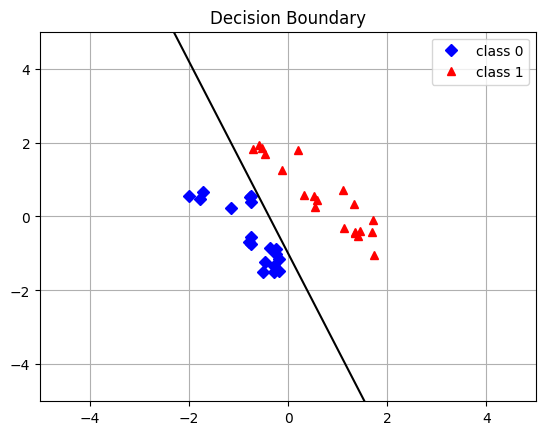

In [117]:
x1_min, x2_min, x1_max, x2_max = plot_decision_boundary(ppn_scaled)

plt.plot(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], 'D', color='blue', label='class 0')
plt.plot(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], '^', color='red', label='class 1')

plt.plot([x1_min, x1_max], [x2_min, x2_max],  color='k')
plt.title('Decision Boundary')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend()
plt.grid()
plt.show()